<a href="https://colab.research.google.com/github/khushalbisani/Urban-Sound-Classification-Btech-Project/blob/master/MFCC_feature_and_deep_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install numpy
!pip install helpers
!pip install soundfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D , GlobalAveragePooling2D
from keras.models import Sequential
import random
import librosa
import librosa.display
import os
import  IPython.display as ipd
from scipy.io import wavfile as wav
import helpers
import soundfile as sf
%matplotlib inline

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
path = "/content/drive/My Drive/Noisy_Sound_Classification/UrbanSound8K/"
data = pd.read_csv(path + "metadata/UrbanSound8K.csv")
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [0]:
# import subprocess
# subprocess.Popen(['ffmpeg'],shell=True)

In [0]:
mfcc_fea = []
max_pad_len = 174

def extract_feature_mfcc(file_name):
  audio , sample_rate = librosa.load(file_name , res_type = 'kaiser_fast')
  mf = librosa.feature.mfcc(y = audio , sr = sample_rate,n_mfcc = 40)
  width = max_pad_len - mf.shape[1]
  mf = np.pad(mf , pad_width = ((0,0),(0,width)) , mode = 'constant')
  return mf

In [0]:
# len(mfcc_fea)

In [0]:
# for row in range(len(data)):
#   file_name = "/content/drive/My Drive/Noisy_Sound_Classification/UrbanSound8K/" + "audio/" + "fold" + str(data['fold'][row]) + "/" + str(data['slice_file_name'][row])
#   if data['end'][row]-data['start'][row] >= 3:
#     class_label = data["classID"][row]
#     fea = extract_feature_mfcc(file_name)
#     if fea.shape != (40,174) : continue
#     mfcc_fea.append((fea,class_label))
#   print(row)

In [0]:
# len(mfcc_fea)

In [0]:
# mf_data = mfcc_fea
# random.shuffle(mf_data)

# train = mf_data[:6500]
# test = mf_data[6500:]

# train_x , train_y = zip(*train)
# test_x , test_y = zip(*test)

# train_x = np.array([x.reshape((40,174,1)) for x in train_x]) 
# test_x = np.array([x.reshape((40,174,1)) for x in test_x])

# train_y = np.array(keras.utils.to_categorical(train_y, 10))
# test_y = np.array(keras.utils.to_categorical(test_y, 10))

In [0]:
# print(train_x.shape)
# print(train_y.shape)
# print(test_x.shape)
# print(test_y.shape)

In [0]:
# np.save('/content/drive/My Drive/Noisy_Sound_Classification/UrbanSound8K/np_array_train_x_mfcc.npy', train_x)
# np.save('/content/drive/My Drive/Noisy_Sound_Classification/UrbanSound8K/np_array_train_y_mfcc.npy', train_y)
# np.save('/content/drive/My Drive/Noisy_Sound_Classification/UrbanSound8K/np_array_test_x_mfcc.npy', test_x)
# np.save('/content/drive/My Drive/Noisy_Sound_Classification/UrbanSound8K/np_array_test_y_mfcc.npy', test_y) 

In [0]:
train_x = np.load('/content/drive/My Drive/Noisy_Sound_Classification/UrbanSound8K/np_array_train_x_mfcc.npy')
train_y = np.load('/content/drive/My Drive/Noisy_Sound_Classification/UrbanSound8K/np_array_train_y_mfcc.npy')
test_x = np.load('/content/drive/My Drive/Noisy_Sound_Classification/UrbanSound8K/np_array_test_x_mfcc.npy')
test_y = np.load('/content/drive/My Drive/Noisy_Sound_Classification/UrbanSound8K/np_array_test_y_mfcc.npy')

In [0]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(6500, 40, 174, 1)
(6500, 10)
(968, 40, 174, 1)
(968, 10)


In [0]:
model = Sequential()
input_shape = (40,174,1)

model.add(Conv2D(16,(2,2),input_shape = input_shape , activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,(2,2), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(2,2), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(2,2), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(GlobalAveragePooling2D())

model.add(Dense(10 , activation='softmax'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 39, 173, 16)       80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 86, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 85, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 42, 32)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 41, 64)         8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 20, 64)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 19, 128)       

In [0]:
model.compile(
	optimizer="Adam",
	loss="categorical_crossentropy",
	metrics=['accuracy'])

history = model.fit(
	x=train_x, 
	y=train_y,
  epochs=15,
  batch_size=128,
    
  validation_data= (test_x, test_y))

score = model.evaluate(
	x=test_x,
	y=test_y)

print('Test loss:', score[0])
print('Test accuracy:', score[1])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 6500 samples, validate on 968 samples
Epoch 1/15
6500/6500 [==============================] - 4s 631us/step - loss: 2.0205 - acc: 0.3803 - val_loss: 1.2646 - val_acc: 0.5713
Epoch 2/15
6500/6500 [==============================] - 2s 257us/step - loss: 1.1801 - acc: 0.5998 - val_loss: 0.9890 - val_acc: 0.6694
Epoch 3/15
6500/6500 [==============================] - 2s 263us/step - loss: 0.9957 - acc: 0.6651 - val_loss: 0.8422 - val_acc: 0.7242
Epoch 4/15
6500/6500 [==============================] - 2s 258us/step - loss: 0.8106 - acc: 0.7240 - val_loss: 0.7484 - val_acc: 0.7376
Epoch 5/15
6500/6500 [==============================] - 2s 258us/step - loss: 0.6974 - acc: 0.7634 - val_loss: 0.6125 - val_acc: 0.7955
Epoch 6/15
6500/6500 [==============================] - 2s 258us/step - loss: 0.5902 - acc: 0.8075 - val_loss: 0.5709 - val_acc: 0.8017
Epoch 7/15
6500/6500 [==================

In [0]:
score = model.evaluate(x = train_x , y = train_y)
print("Training Accuracy :",score[1])
print('Training Loss:', score[0])

score = model.evaluate(x = test_x , y = test_y)
print("Test Accuracy :",score[1])
print('Test Loss:', score[0])


6500/6500 [==============================] - 1s 133us/step
Training Accuracy : 0.9133846153846154
Training Loss: 0.2510189772752615
968/968 [==============================] - 0s 129us/step
Test Accuracy : 0.890495867768595
Test Loss: 0.3100424865799502


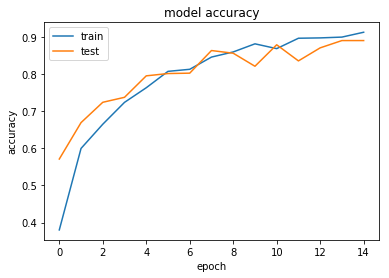

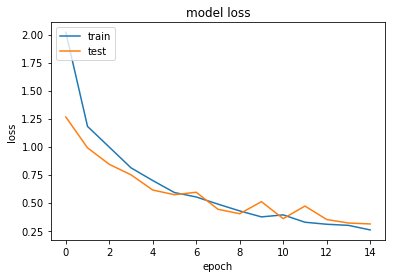

In [0]:
# from keras import utils
# utils.plot_model(model, to_file=path+'mfcc_cnn_model.png', show_shapes=True, show_layer_names=True, rankdir='LR')
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:

pred = model.predict(test_x)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_y,axis = 1)

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

CM = confusion_matrix(y_true, pred)
print(CM)

[[115   0   1   0   1   0   0   1   2   1]
 [  1  25   0   0   2   0   0   1   0   0]
 [  1   0  95   3   3   2   0   0   3  21]
 [  0   0   2  75   2   1   0   0   2   4]
 [  0   0   0   0 102   0   0   2   0   0]
 [  0   0   0   0   2 108   0   0   2   3]
 [  0   0   0   0   0   0   5   0   0   0]
 [  1   0   0   0  17   0   0 110   0   1]
 [  1   0   0   0   0   0   0   0 121   2]
 [  6   0   6   1   6   2   0   0   0 106]]


Text(33.0, 0.5, 'True label')

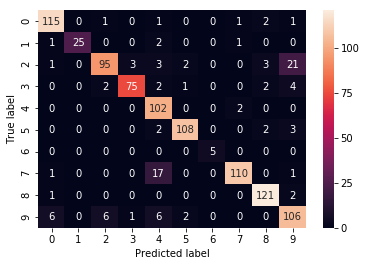

In [0]:
sns.heatmap(CM, annot=True, fmt="d")
plt.xlabel("Predicted label")
plt.ylabel("True label")

In [0]:
sum=0
for i in range(10):
  for j in range(10):
    sum+=CM[i][j]
    if(i==j):
      x=CM[i][j]
  print(i," ",x/sum)
  sum=0

0   0.9504132231404959
1   0.8620689655172413
2   0.7421875
3   0.872093023255814
4   0.9807692307692307
5   0.9391304347826087
6   1.0
7   0.8527131782945736
8   0.9758064516129032
9   0.8346456692913385


In [0]:
# np.save('/content/drive/My Drive/Noisy_Sound_Classification/UrbanSound8K/mfcc_train_acc.npy', history.history['acc'])
# np.save('/content/drive/My Drive/Noisy_Sound_Classification/UrbanSound8K/mfcc_test_acc.npy', history.history['val_acc'])
# np.save('/content/drive/My Drive/Noisy_Sound_Classification/UrbanSound8K/mfcc_train_loss.npy', history.history['loss'])
# np.save('/content/drive/My Drive/Noisy_Sound_Classification/UrbanSound8K/mfcc_test_loss.npy', history.history['val_loss']) 

In [0]:
print(pred)

[9 9 5 4 8 7 2 9 8 7 6 0 3 4 2 8 4 2 3 8 8 7 4 4 9 8 5 5 4 5 2 9 8 5 3 5 4
 3 0 0 8 3 3 8 4 2 8 0 3 4 5 1 7 2 0 4 4 8 8 7 0 8 3 0 0 9 4 8 8 5 0 1 9 9
 8 9 7 8 4 8 9 7 3 0 4 0 0 9 0 0 7 4 8 2 7 4 5 3 2 2 0 3 9 3 4 0 3 2 9 3 5
 8 8 5 3 4 8 5 8 7 9 0 9 4 4 4 3 0 2 4 6 9 8 2 4 4 8 2 2 7 2 5 5 9 4 2 1 9
 4 3 0 9 5 9 2 4 2 9 2 7 3 0 0 8 5 5 3 0 4 7 8 5 3 5 7 7 2 8 0 0 5 0 7 4 5
 4 2 0 0 3 4 9 4 7 0 7 9 4 7 0 7 9 5 0 1 2 7 5 8 5 8 5 1 7 5 7 4 2 1 9 5 0
 9 9 3 0 4 7 8 8 5 2 8 8 9 4 2 1 9 0 4 3 3 4 5 1 9 1 4 5 0 4 0 5 7 0 7 2 8
 2 5 0 8 9 4 9 8 3 3 4 7 7 7 0 2 2 3 0 3 1 5 2 9 7 5 0 4 5 3 4 3 0 2 9 9 2
 9 7 9 9 7 2 0 9 2 3 7 3 7 4 4 0 9 3 7 5 9 4 2 5 3 0 0 4 5 5 5 0 2 2 4 7 7
 0 2 8 7 0 0 2 7 8 4 4 4 8 0 8 7 7 0 4 0 9 5 4 5 7 9 7 8 3 3 0 2 5 7 3 4 3
 4 2 4 5 9 9 9 0 8 7 4 1 0 9 7 8 7 2 8 5 2 7 4 9 5 9 2 1 4 8 8 9 8 6 4 9 7
 9 0 8 2 9 5 0 7 8 0 0 9 0 8 5 6 4 0 8 2 0 2 4 2 8 8 9 0 0 7 7 7 2 5 9 1 2
 5 7 5 2 8 9 3 8 5 2 5 8 4 1 2 2 5 2 2 0 2 5 5 8 4 7 5 9 0 0 0 5 9 5 3 7 4
 2 2 1 2 3 0 4 7 4 3 2 4 